# Colab Notebook

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

In [2]:
mnist = pd.read_csv("sample_data/mnist_train_small.csv", header=None)
mnist.head()

0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
0    6    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2    7    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3    9    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[5 rows x 785 columns]

In [3]:
mnist = mnist.to_numpy()
mnist[:5]

array([[6, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [4]:
mnist.shape

(20000, 785)

In [5]:
mnist.dtype

dtype('int64')

In [0]:
from sklearn.model_selection import train_test_split
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = train_test_split(mnist[:, 1:], mnist[:, 0], test_size=0.1)

# Basic neural network

In [7]:
input_layer = keras.Input((784,))
output_layer = keras.layers.Dense(1)(input_layer)

model = keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


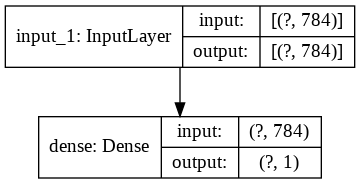

In [8]:
keras.utils.plot_model(model, 'basic_nn.png', show_shapes=True)

In [9]:
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
model.fit(x_train_mnist, y_train_mnist, 
          batch_size=64,
          epochs=5,
          validation_split=0.2
          )

Epoch 1/5
225/225 [==============================] - 1s 2ms/step - loss: 1382.7939 - accuracy: 0.1169 - val_loss: 491.3289 - val_accuracy: 0.0972
Epoch 2/5
225/225 [==============================] - 0s 2ms/step - loss: 514.5417 - accuracy: 0.1088 - val_loss: 484.6317 - val_accuracy: 0.1044
Epoch 3/5
225/225 [==============================] - 0s 2ms/step - loss: 392.7198 - accuracy: 0.1059 - val_loss: 529.2592 - val_accuracy: 0.1019
Epoch 4/5
225/225 [==============================] - 0s 2ms/step - loss: 334.1331 - accuracy: 0.1077 - val_loss: 176.5609 - val_accuracy: 0.1064
Epoch 5/5
225/225 [==============================] - 0s 2ms/step - loss: 292.6468 - accuracy: 0.1067 - val_loss: 463.9995 - val_accuracy: 0.1083


In [10]:
model.predict(mnist[:5, 1:])

array([[21.430338],
       [21.425428],
       [26.483475],
       [31.406525],
       [24.571022]], dtype=float32)

In [11]:
# Actual values
print(mnist[:5, 0])

[6 5 7 9 5]


# Softmax NN

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


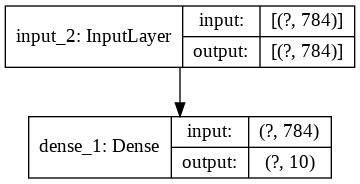

In [12]:
input_layer = keras.Input((784, ))
output_layer = keras.layers.Dense(10, activation='sigmoid')(input_layer)

model = keras.Model(inputs=input_layer, outputs=output_layer)

print(model.summary())
keras.utils.plot_model(model, 'softmax_nn.png', show_shapes=True)

In [13]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
model.fit(x_train_mnist, encoder.fit_transform(y_train_mnist.reshape((-1, 1))).toarray().astype(int),
          validation_split=0.2
          )

450/450 [==============================] - 1s 2ms/step - loss: 2.0943 - accuracy: 0.3998 - val_loss: 2.0010 - val_accuracy: 0.4686


In [15]:
model.evaluate(x_test_mnist, encoder.transform(y_test_mnist.reshape((-1, 1))).toarray().astype(int))

63/63 [==============================] - 0s 1ms/step - loss: 2.0089 - accuracy: 0.4655


[2.008941173553467, 0.46549999713897705]